# Hamiltonian
This file compare NODE, ANODE, Hamiltonian Inspired ODE and Hamiltonian ODE Network.

# generate the data and import the nessasery package

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import numpy 
device = torch.device('cpu')
from experiments.dataloaders import ConcentricSphere
from torch.utils.data import DataLoader
from viz.plots import single_feature_plt

# Create training data in 2D, consisting of a concentric disk and an annulus
data_dim = 2
data_concentric = ConcentricSphere(data_dim, inner_range=(0., .5), outer_range=(1., 1.5), 
                                   num_points_inner=1000, num_points_outer=2000)
dataloader = DataLoader(data_concentric, batch_size=64, shuffle=True)

# Visualize a batch of data (use a large batch size for visualization)
dataloader_viz = DataLoader(data_concentric, batch_size=256, shuffle=True)
for inputs, targets in dataloader_viz:
    break
from anode.models import ODENet
from anode.training import Trainer


hidden_dim = 32
num_epochs = 24
from viz.plots import trajectory_plt

# To make the plot clearer, we will use a smaller batch of data
for small_inputs, small_targets in dataloader:
    break

    
data_concentric2 = ConcentricSphere(data_dim, inner_range=(0., .5), outer_range=(1., 1.5), 
                                   num_points_inner=100, num_points_outer=200)
dataloader2 = DataLoader(data_concentric2, batch_size=64, shuffle=True)
dataloader_viz2 = DataLoader(data_concentric2, batch_size=256, shuffle=True)
for test_inputs, test_targets in dataloader_viz2:
    break

from viz.plots import input_space_plt


# NODE
train a Node network with level 2

$Level\ 2:\ f(x,\theta)= W_2\sigma (W_1X+b_1)+b_2 $

In [2]:
num_epochs = 24
model = ODENet(device, data_dim, hidden_dim, time_dependent=False,level=2,
               non_linearity='relu')

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

trainer = Trainer(model, optimizer, device,verbose=False)
trainer.train(dataloader,test_inputs, test_targets,num_epochs)

###### the trajectory



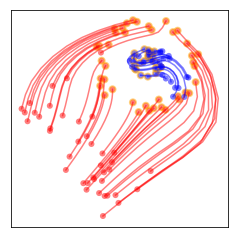

In [3]:
trajectory_plt(model, small_inputs, small_targets, timesteps=10)

###### the train loss



Text(0, 0.5, 'Loss')

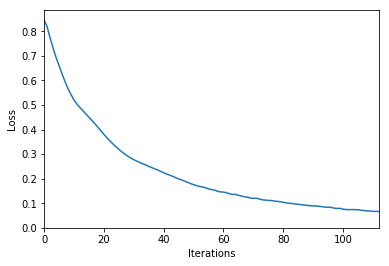

In [4]:
plt.plot(trainer.histories['test_loss_history'])
plt.xlim(0, len(trainer.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

###### the decision region

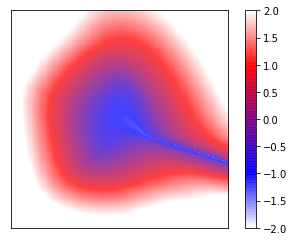

In [5]:
input_space_plt(model)

# Anode
train a Anode network with level 2, augment dimension = 5


In [6]:

amodel = ODENet(device, data_dim, hidden_dim, time_dependent=False,level=2,augment_dim=5,
               non_linearity='relu')

aoptimizer = torch.optim.Adam(amodel.parameters(), lr=1e-3)

atrainer = Trainer(amodel, aoptimizer, device,verbose=False)
atrainer.train(dataloader,test_inputs, test_targets,num_epochs)

###### the trajectory



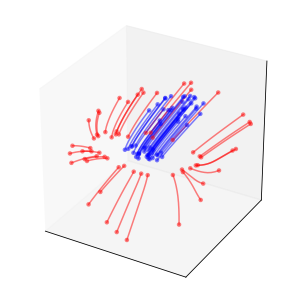

In [55]:

trajectory_plt(amodel, small_inputs, small_targets, timesteps=10)


###### the train loss



Text(0, 0.5, 'Loss')

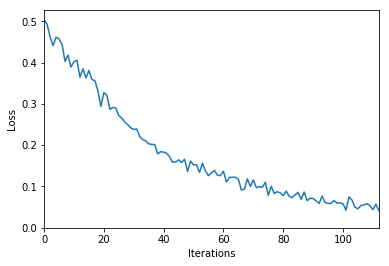

In [55]:
plt.plot(trainer.histories['loss_history'])
plt.xlim(0, len(trainer.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

###### the decision region

This is a very good result, we can clearly seperate two class

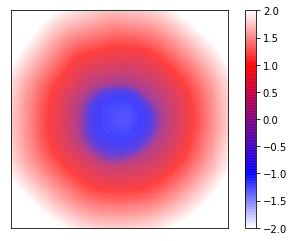

In [54]:
input_space_plt(amodel)

# Hamiltonian Inspired Network
$$\dot{x}(t)= \nabla_z G(z(t))=\sigma(K(t)^T z(t)+b_z(t))$$
$$\dot{z}(t)= -\nabla_x F(x(t))=-\sigma(K(t)x(t)+b(t))$$
$$x(0)=x_0,\ z(0)=\textbf{0}$$

###### ODE Model training with augment = hidden_dim = 32 with level 1
$$\dot{x}(t)= \sigma(W^T z(t)+b_z)$$
$$\dot{z}(t)= -\sigma(W x(t)+b)$$
What's more, here the final time =10 that we could have good result

In [2]:

from hamiltonianNN.models import HODENet
from hamiltonianNN.training import Trainer
hidden_dim = 32
num_epochs = 36

model3 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=3,augment_dim=-1,
               non_linearity='relu',eval_time=1)

optimizer3 = torch.optim.Adam(model3.parameters(), lr=1e-3)

trainer3 = Trainer(model3, optimizer3, device,verbose=False)
trainer3.train(dataloader,test_inputs, test_targets,num_epochs)

Test loss

Text(0, 0.5, 'Test Loss')

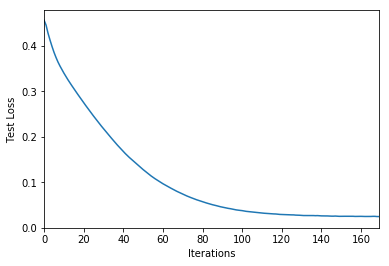

In [12]:
plt.plot(trainer3.histories['test_loss_history'])
plt.xlim(0, len(trainer3.histories['test_loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Test Loss')

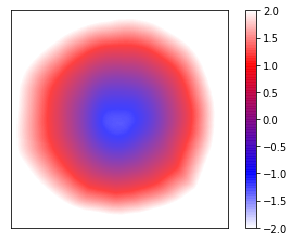

In [13]:

input_space_plt(model3)

plot the trajectory on the dota space(without augment dimension)

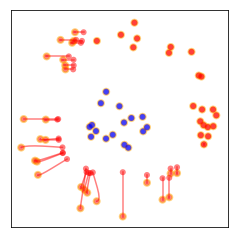

In [3]:
trajectory_plt(model3, small_inputs, small_targets, timesteps=10)

###### ODE Model training with augment = hidden_dim = 32 with level 2
$$\dot{x}(t)=W_1^T \sigma(W_2^T z(t)+b_z)+b_{z2}$$
$$\dot{z}(t)= - W_2\sigma(W_1 x(t)+b_1)+b2$$

In [3]:
num_epochs = 36
model4 = ODENet(device, data_dim, hidden_dim, time_dependent=False,level=4,
               non_linearity='relu',eval_time=1)

optimizer4 = torch.optim.Adam(model4.parameters(), lr=1e-3)

trainer4 = Trainer(model4, optimizer4, device,verbose=False)
trainer4.train(dataloader,test_inputs, test_targets,num_epochs)

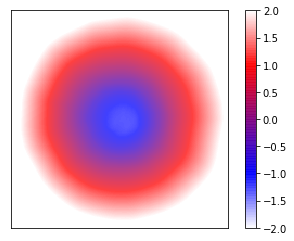

In [8]:
input_space_plt(model4)

Train loss

Text(0, 0.5, 'Loss')

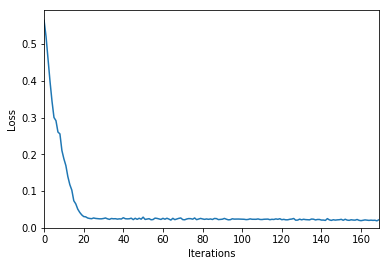

In [9]:
plt.plot(trainer4.histories['loss_history'])
plt.xlim(0, len(trainer4.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

plot the trajectory on the dota space(without augment dimension)

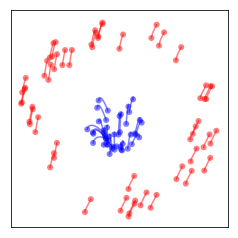

In [10]:
trajectory_plt(model4, small_inputs, small_targets, timesteps=10)

# Our Hamiltonian NN with classical dynamics

$y(t)=\left[
 \begin{matrix}
   x(t) \\
   a(t)
  \end{matrix}
  \right]$
  
$H(y,z,t)=\frac{1}{2}z^T W z + F(y) $

$where\ \left\{
\begin{aligned}
\ &\nabla_x F(y)=\sigma\Big(K(t)y+b(t)\Big)\\
&W\ is\ Symmetrical\ positive \ W=K_2 K_2^T
\end{aligned}
\right.
$

In [4]:

from hamiltonianNN.models import HODENet
from hamiltonianNN.training import Trainer
num_epochs=24
model5 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=5,augment_dim=0,
               non_linearity='relu',eval_time=1)

optimizer5 = torch.optim.Adam(model5.parameters(), lr=1e-3)

trainer5 = Trainer(model5, optimizer5, device,verbose=False)
trainer5.train(dataloader,test_inputs, test_targets,num_epochs)

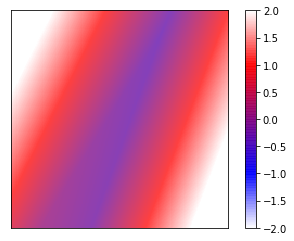

In [9]:
input_space_plt(model5)

Text(0, 0.5, 'Loss')

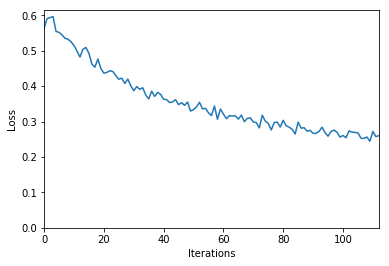

In [10]:
plt.plot(trainer5.histories['loss_history'])
plt.xlim(0, len(trainer5.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

In [5]:
model6 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=5,augment_dim=1,
               non_linearity='relu',eval_time=1)

optimizer6 = torch.optim.Adam(model6.parameters(), lr=1e-3)

trainer6 = Trainer(model6, optimizer6, device,verbose=False)
trainer6.train(dataloader,test_inputs, test_targets,num_epochs)

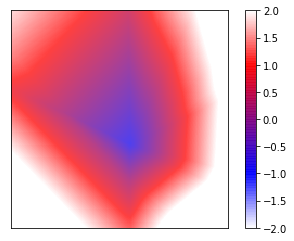

In [6]:
input_space_plt(model6)

Text(0, 0.5, 'Loss')

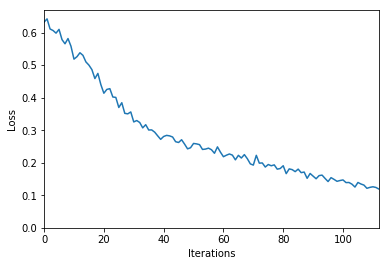

In [7]:
plt.plot(trainer6.histories['loss_history'])
plt.xlim(0, len(trainer6.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

In [8]:
model7 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=5,augment_dim=2,
               non_linearity='relu',eval_time=1)

optimizer7 = torch.optim.Adam(model7.parameters(), lr=1e-3)

trainer7 = Trainer(model7, optimizer7, device,verbose=False)
trainer7.train(dataloader,test_inputs, test_targets,num_epochs)

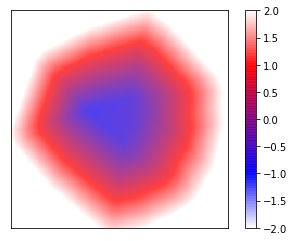

In [9]:
input_space_plt(model7)

Text(0, 0.5, 'Loss')

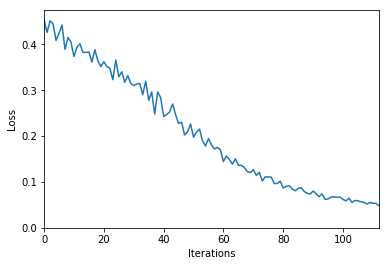

In [10]:
plt.plot(trainer7.histories['loss_history'])
plt.xlim(0, len(trainer7.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

In [11]:
model8 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=5,augment_dim=5,
               non_linearity='relu',eval_time=1)

optimizer8 = torch.optim.Adam(model8.parameters(), lr=1e-3)

trainer8 = Trainer(model8, optimizer8, device,verbose=False)
trainer8.train(dataloader,test_inputs, test_targets,num_epochs)

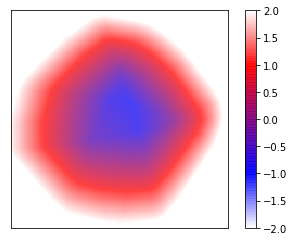

In [12]:
input_space_plt(model8)

Text(0, 0.5, 'Loss')

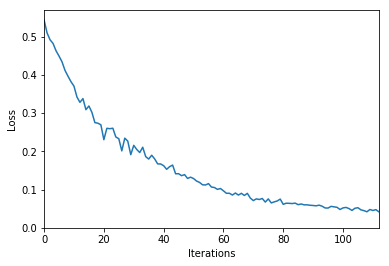

In [13]:
plt.plot(trainer8.histories['loss_history'])
plt.xlim(0, len(trainer8.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')

In [14]:
model9 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=5,augment_dim=10,
               non_linearity='relu',eval_time=1)

optimizer9 = torch.optim.Adam(model9.parameters(), lr=1e-3)

trainer9 = Trainer(model9, optimizer9, device,verbose=False)
trainer9.train(dataloader,test_inputs, test_targets,num_epochs)

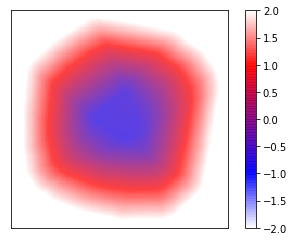

In [15]:
input_space_plt(model9)

In [16]:
model10 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=5,augment_dim=30,
               non_linearity='relu',eval_time=1)

optimizer10 = torch.optim.Adam(model10.parameters(), lr=1e-3)

trainer10 = Trainer(model10, optimizer10, device,verbose=False)
trainer10.train(dataloader,test_inputs, test_targets,num_epochs)

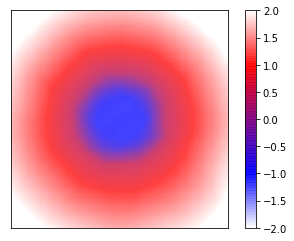

In [17]:
input_space_plt(model10)

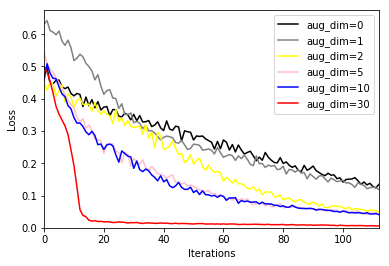

In [18]:
plt.plot(trainer5.histories['loss_history'],color='black',label='aug_dim=0')
plt.plot(trainer6.histories['loss_history'],color='gray',label='aug_dim=1')
plt.plot(trainer7.histories['loss_history'],color='yellow',label='aug_dim=2')
plt.plot(trainer8.histories['loss_history'],color='pink',label='aug_dim=5')
plt.plot(trainer9.histories['loss_history'],color='blue',label='aug_dim=10')
plt.plot(trainer10.histories['loss_history'],color='red',label='aug_dim=30')
plt.xlim(0, len(trainer5.histories['loss_history']) - 1)
plt.ylim(0)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# New potentials
No Potential corresponds to classical NN dynamics(refer to our note)

Here we propose two new potentials: Quadratic Potentials and Generalized Linear Potentials.

What's more, here we use Leapfrog and Verlet intergration.


### function to compute the energy

In [11]:

from viz.plots import Hamiltonian_computation, hamiltonian_plot,hamiltonian_hist



from hamiltonianNN.models import HODENet
from hamiltonianNN.training import Trainer

# Our Hamiltonian NN with Quadratic Potentials


  
$H(y,z,t)=\frac{1}{2}z^T M z + F(\frac{1}{2}y^TWy+b^Ty) $

$where\ \left\{
\begin{aligned}
\ &\dot{z} = \nabla_y F(y)=\sigma\Big(\frac{1}{2}y^TWy+b^Ty\Big)\Big(\frac{1}{2}(W^T+W)y+b\Big)\\
&M\ is\ Symmetrical\ positive \ M=K_2 K_2^T
\end{aligned}
\right.
$

###### ODE Model training with augment = 1


In [12]:
num_epochs = 48
modelQ = HODENet(device, data_dim, hidden_dim=0, time_dependent=False,level=6,augment_dim=1,
               non_linearity='tanh',eval_time=1,method='leapfrog')

optimizerQ = torch.optim.Adam(modelQ.parameters(), lr=1e-3)

trainerQ = Trainer(modelQ, optimizerQ, device,verbose=False)
trainerQ.train(dataloader,test_inputs, test_targets,num_epochs )

/Users/pingguo/WTF/Plus/DeepLearning/intership/ENSIIE_Intership/Hamilton_Network/torchdiffeq/_impl/misc.py:81: UserWarning: Leapfrog: Unexpected arguments {'max_num_steps': 1000}
  warnings.warn('{}: Unexpected arguments {}'.format(solver.__class__.__name__, unused_kwargs))


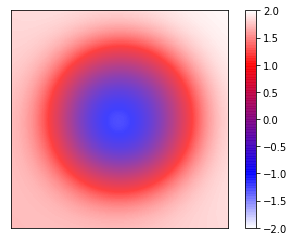

In [13]:
input_space_plt(modelQ)

The losses of Network

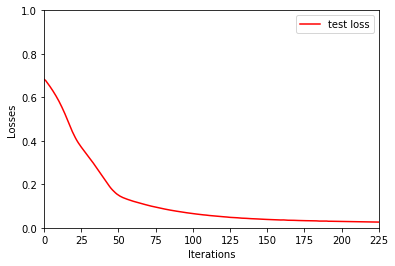

In [14]:
plt.plot(trainerQ.histories['test_loss_history'],color='red',label='test loss')
#plt.plot(trainerQ.histories['loss_history'],label='train loss')
plt.xlim(0, len(trainerQ.histories['test_loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.legend()



### Hamiltonian Iteration with time : Quadratic Potentials

Here is a problem, the kinetic energy changes always less than the change of potential energy, so that the Hamiltonian is not constant. We also should consider the numerical error.


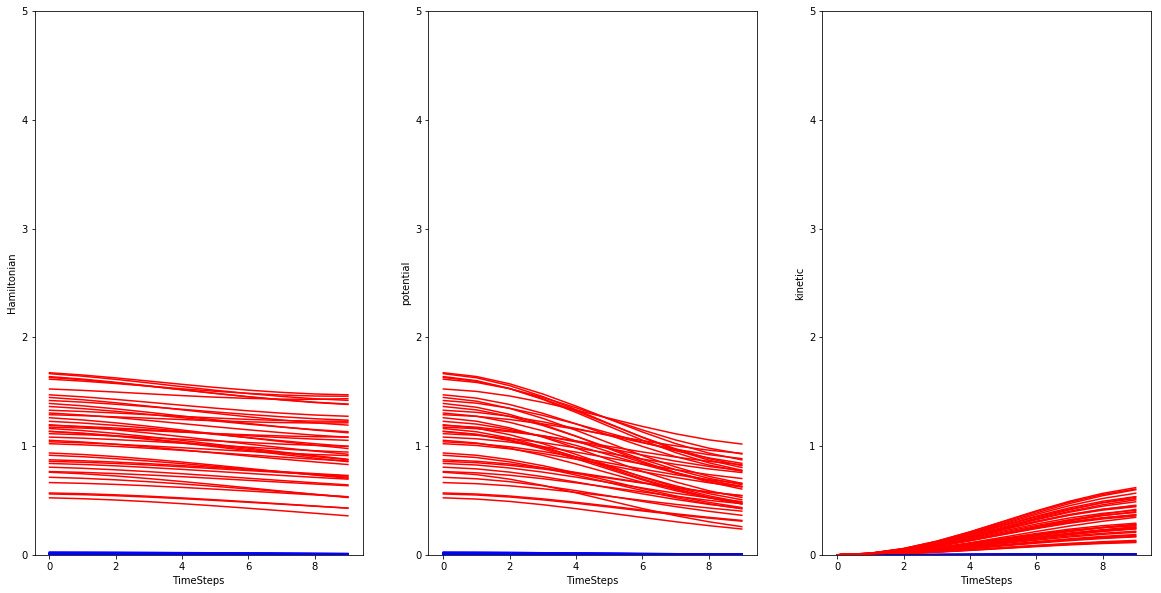

In [15]:
Hamiltonian_computation(modelQ,small_inputs ,small_targets ,
                        steps=10,activation='tanh',ponential='quadratic',
                        show=True,y=5)

array([7.41516638, 7.3309741 , 7.24759054, ..., 7.28773451, 7.36689901,
       7.44687414])

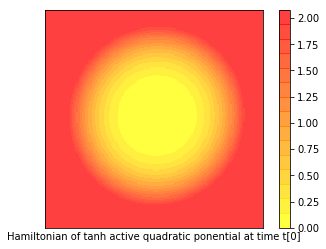

In [16]:
hamiltonian_plot(modelQ,activation='tanh',ponential='quadratic',step=0,enegy=0)

Plot the trajectory.

Where the yellow points are the initial positions.

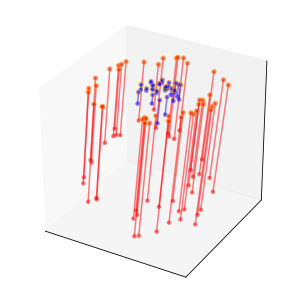

In [17]:
from viz.plots import trajectory_plt

# To make the plot clearer, we will use a smaller batch of data
for small_inputs, small_targets in dataloader:
    break

trajectory_plt(modelQ, small_inputs, small_targets, timesteps=10)

# Our Hamiltonian NN with Generalized Linear Potentials


  
$H(y,z,t)=\frac{1}{2}z^T M z +  \mathbf{\alpha^T}F(W^Ty+b) $

$where\ \left\{
\begin{aligned}
\ &\nabla_y F(y)=\frac{\partial V}{\partial y}(y)= W\mathbf{diag(\alpha)} \sigma(W^Ty+b))\\
&M\ is\ Symmetrical\ positive \ M=K_2 K_2^T
\end{aligned}
\right.
$

###### ODE Model training with $\alpha = [1, 1 , 1, ..., 1]$

In [44]:
hidden_dim=32
modelG = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=7,augment_dim=1,
               non_linearity='tanh',eval_time=1,method='leapfrog')

optimizerG = torch.optim.Adam(modelG.parameters() )

trainerG = Trainer(modelG, optimizerG, device,verbose=False)
trainerG.train(dataloader,test_inputs, test_targets,num_epochs)

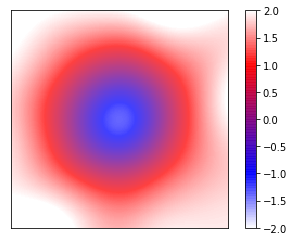

In [45]:
input_space_plt(modelG)

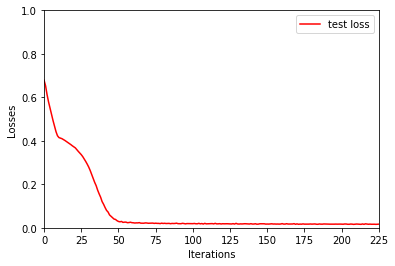

In [49]:
plt.plot(trainerG.histories['test_loss_history'],color='red',label='test loss')
#plt.plot(trainerG.histories['loss_history'],label='train loss')
plt.xlim(0, len(trainerQ.histories['test_loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.legend()

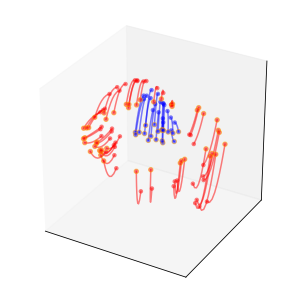

In [47]:
from viz.plots import trajectory_plt

# To make the plot clearer, we will use a smaller batch of data
for small_inputs, small_targets in dataloader:
    break

trajectory_plt(modelG, small_inputs, small_targets, timesteps=10)

### Hamiltonian Energy with Generalized Linear Potentials

Here the Hamiltonian is almost constant, which is better than before.

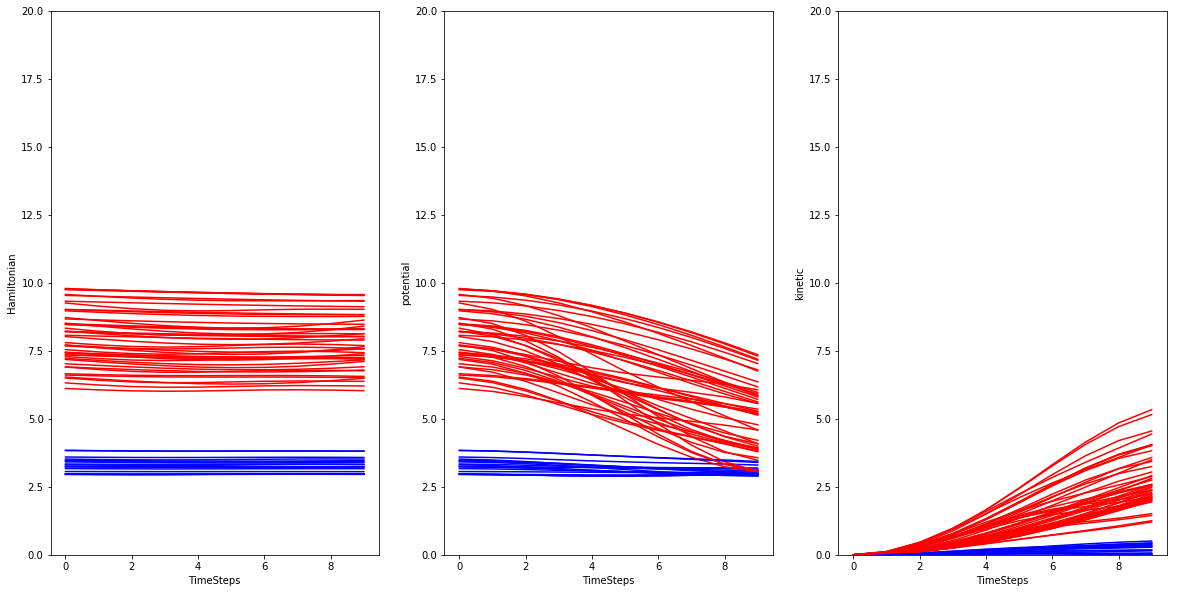

In [48]:
Hamiltonian_computation(modelG,small_inputs,
                        small_targets,steps=10,activation='tanh',
                        ponential='linear',show=True,y=20)

### Hamiltonian plot with Generalized Linear Potentials

step=0: the initial state

enegy=0: the total energy

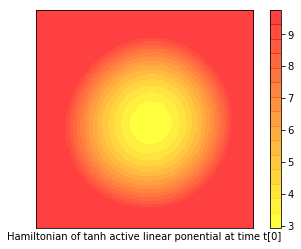

In [50]:
h9=hamiltonian_plot(modelG,activation='tanh',step=0,enegy=0)

# Compare with tanh and relu( Generalized Linear Potentials and Quadratic)

In [61]:
hidden_dim=32
modelG2 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=7,augment_dim=1,
               non_linearity='relu',eval_time=1,method='leapfrog')

optimizerG2 = torch.optim.Adam(modelG2.parameters() )

trainerG2 = Trainer(modelG2, optimizerG2, device,verbose=False)
trainerG2.train(dataloader,test_inputs, test_targets,num_epochs)

In [52]:
num_epochs = 48
modelQ2 = ODENet(device, data_dim, hidden_dim, time_dependent=False,level=6,augment_dim=1,
               non_linearity='relu',eval_time=1,method='leapfrog')

optimizerQ2 = torch.optim.Adam(modelQ2.parameters(), lr=1e-3)

trainerQ2 = Trainer(modelQ2, optimizerQ2, device,verbose=False)
trainerQ2.train(dataloader,test_inputs, test_targets,num_epochs )

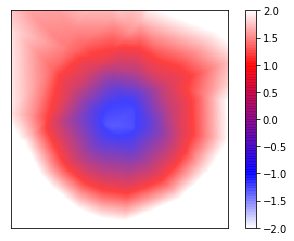

In [96]:
input_space_plt(modelG2)

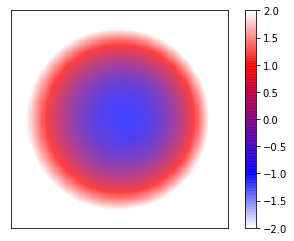

In [95]:
input_space_plt(modelQ2)

### test loss

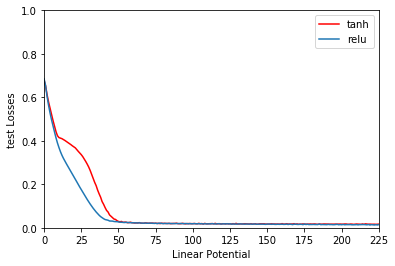

In [53]:

plt.plot(trainerG.histories['test_loss_history'],color='red',label='tanh')
plt.plot(trainerG2.histories['test_loss_history'],label='relu')
plt.xlim(0, len(trainerG.histories['loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Linear Potential' )
plt.ylabel('test Losses')
plt.legend()



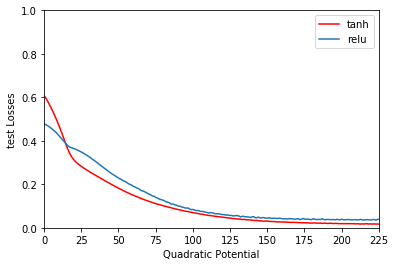

In [54]:

plt.plot(trainerQ.histories['test_loss_history'],color='red',label='tanh')
plt.plot(trainerQ2.histories['test_loss_history'],label='relu')
plt.xlim(0, len(trainerQ.histories['loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Quadratic Potential')
plt.ylabel('test Losses')
plt.legend()



### Enegy change

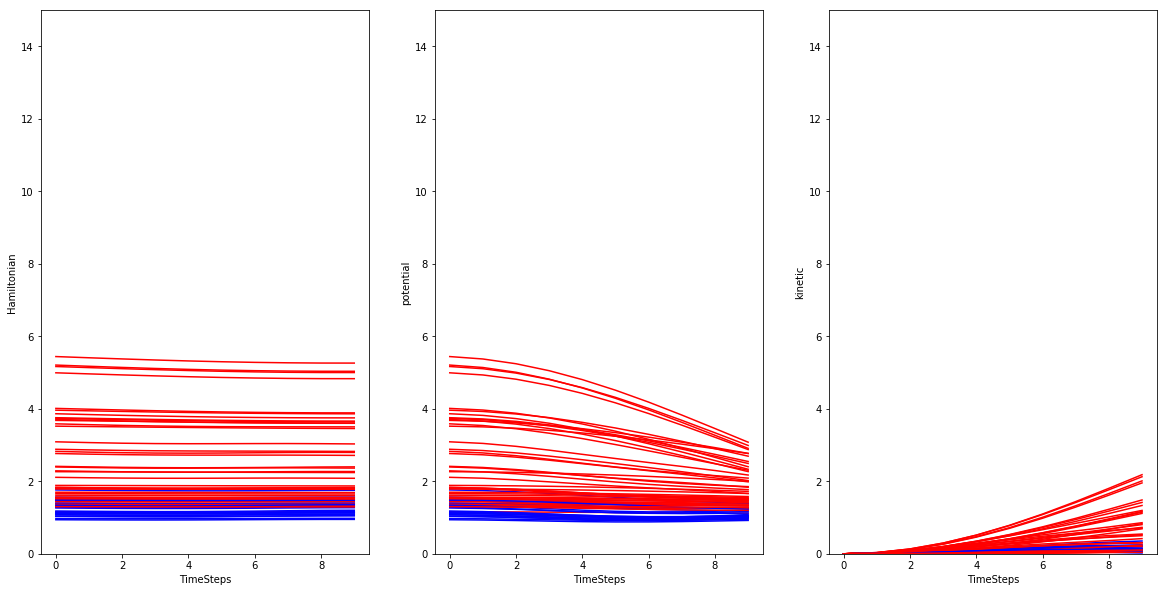

In [67]:
Hamiltonian_computation(modelG2,small_inputs,
                        small_targets,steps=10,activation='relu',
                        ponential='linear',show=True,y=15)

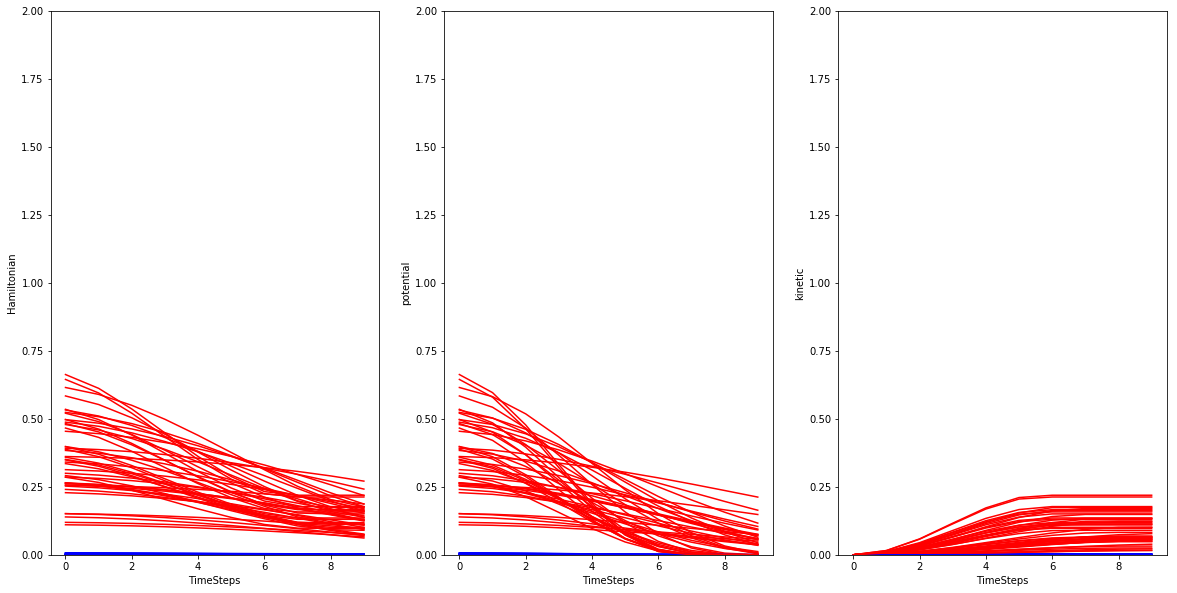

In [57]:
Hamiltonian_computation(modelQ2,small_inputs,
                        small_targets,steps=10,activation='relu',
                        ponential='quadratic',show=True,y=2)

### Hamiltonian plot with Generalized Linear Potentials

step=0: the initial state

enegy=0: the total energy

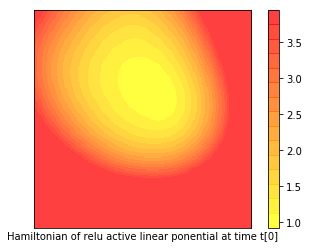

In [68]:
h9=hamiltonian_plot(modelG2,activation='relu',step=0,enegy=0)

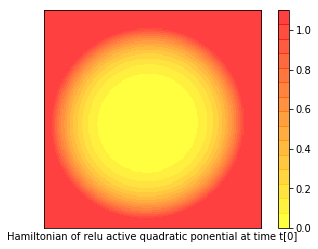

In [88]:
h9=hamiltonian_plot(modelQ2,activation='relu',ponential='quadratic',step=0,enegy=0)

# Compare with Verlet and Leapfrog

In [80]:
hidden_dim=32
modelG3 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=7,augment_dim=1,
               non_linearity='relu',eval_time=1,method='verlet')


optimizerG3 = torch.optim.Adam(modelG3.parameters())

trainerG3 = Trainer(modelG3, optimizerG3, device,verbose=False)
trainerG3.train(dataloader,test_inputs, test_targets,num_epochs)

In [71]:

modelQ3 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=6,augment_dim=1,
               non_linearity='tanh',eval_time=1,method='verlet')

optimizerQ3 = torch.optim.Adam(modelQ3.parameters(), lr=1e-3)

trainerQ3 = Trainer(modelQ3, optimizerQ3, device,verbose=False)
trainerQ3.train(dataloader,test_inputs, test_targets,num_epochs )

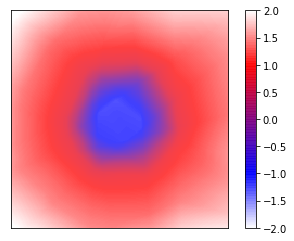

In [81]:
input_space_plt(modelG3)

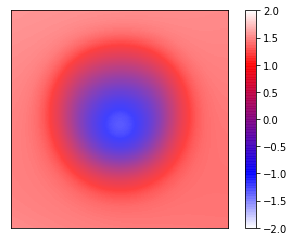

In [73]:
input_space_plt(modelQ3)

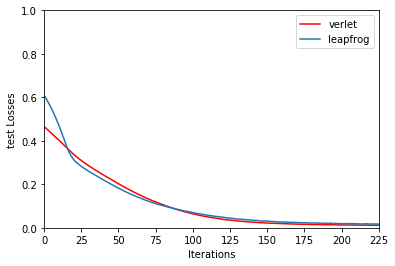

In [90]:

plt.plot(trainerQ3.histories['test_loss_history'],color='red',label='verlet')
plt.plot(trainerQ.histories['test_loss_history'],label='leapfrog')
plt.xlim(0, len(trainerG.histories['loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('test Losses')
plt.legend()



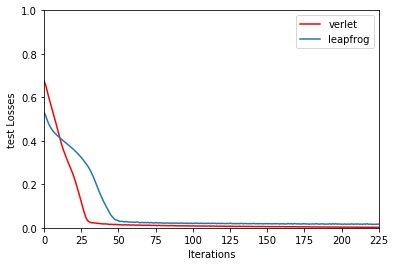

In [91]:

plt.plot(trainerG3.histories['test_loss_history'],color='red',label='verlet')
plt.plot(trainerG2.histories['test_loss_history'],label='leapfrog')
plt.xlim(0, len(trainerG.histories['loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('test Losses')
plt.legend()



array([10.15137291, 10.09160423, 10.03252792, ...,  7.91596317,
        8.02493095,  8.13519192])

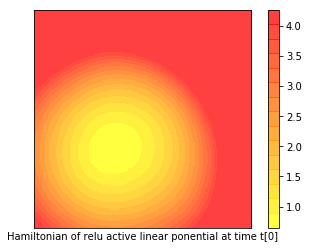

In [89]:

hamiltonian_plot(modelG3,activation='relu',step=0,enegy=0)

array([10.66112423, 10.523592  , 10.38745689, ..., 12.2517786 ,
       12.38969135, 12.52900124])

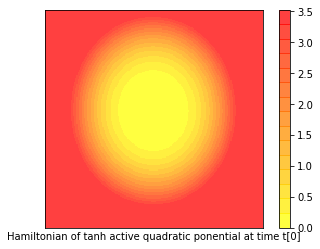

In [92]:

hamiltonian_plot(modelQ3,activation='tanh',ponential='quadratic',step=0,enegy=0)

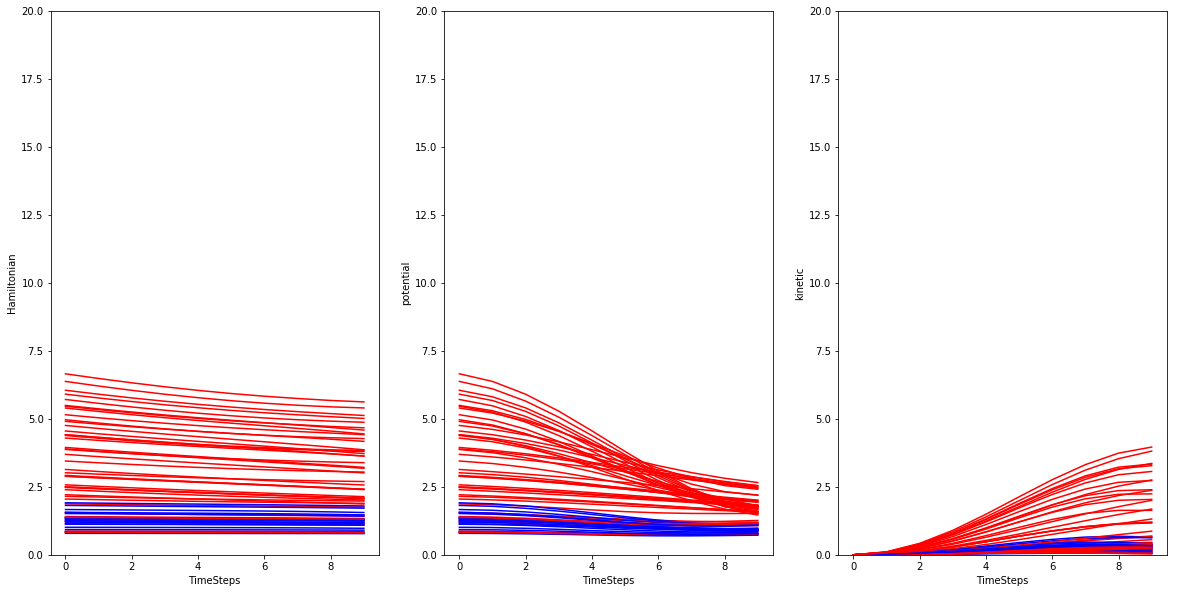

In [84]:
Hamiltonian_computation(modelG3,small_inputs,
                        small_targets,steps=10,activation='relu',
                        ponential='linear',show=True,y=20)

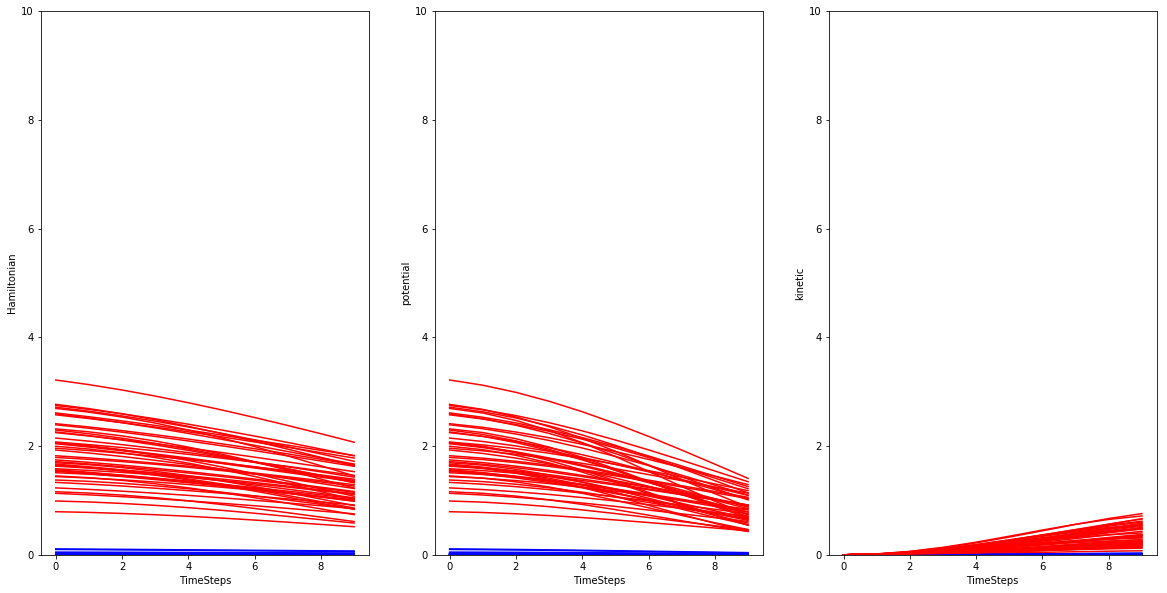

In [93]:
Hamiltonian_computation(modelQ3,small_inputs,
                        small_targets,steps=10,activation='tanh',
                        ponential='quadratic',show=True,y=10)

# Our Hamiltonian NN with Quadratic Potentials


  
$H(y,z,t)=\frac{1}{2}z^T M z + F(\frac{1}{2}y^TWy+b^Ty) $

$where\ \left\{
\begin{aligned}
\ &\nabla_y F(y)=\sigma\Big(\frac{1}{2}y^TWy+b^Ty\Big)\Big(  W y+b\Big)\\
&M\ is\ Symmetrical\ positive \ M=K_2 K_2^T
\end{aligned}
\right.
$

In [33]:

modelQ2 = HODENet(device, data_dim, hidden_dim, time_dependent=False,level=8,augment_dim=0,
               non_linearity='tanh',eval_time=1,method='verlet')

optimizerQ2 = torch.optim.Adam(modelQ2.parameters(), lr=1e-3)

trainerQ2= Trainer(modelQ2, optimizerQ2, device,verbose=False)
trainerQ2.train(dataloader,test_inputs, test_targets,num_epochs )

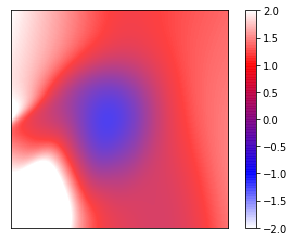

In [34]:
input_space_plt(modelQ2)

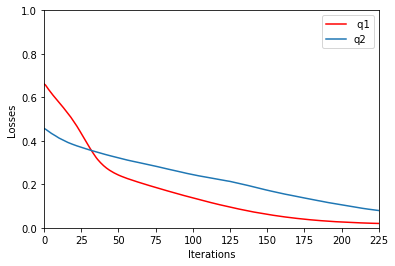

In [35]:
plt.plot(trainerQ.histories['test_loss_history'],color='red',label=' q1')
plt.plot(trainerQ2.histories['test_loss_history'],label='q2')
plt.xlim(0, len(trainerQ.histories['test_loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.legend()



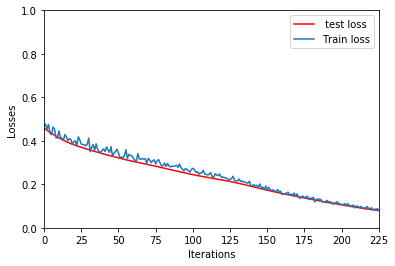

In [36]:
plt.plot(trainerQ2.histories['test_loss_history'],color='red',label=' test loss')
plt.plot(trainerQ2.histories['loss_history'],label='Train loss')
plt.xlim(0, len(trainerQ2.histories['test_loss_history']) - 1)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.legend()


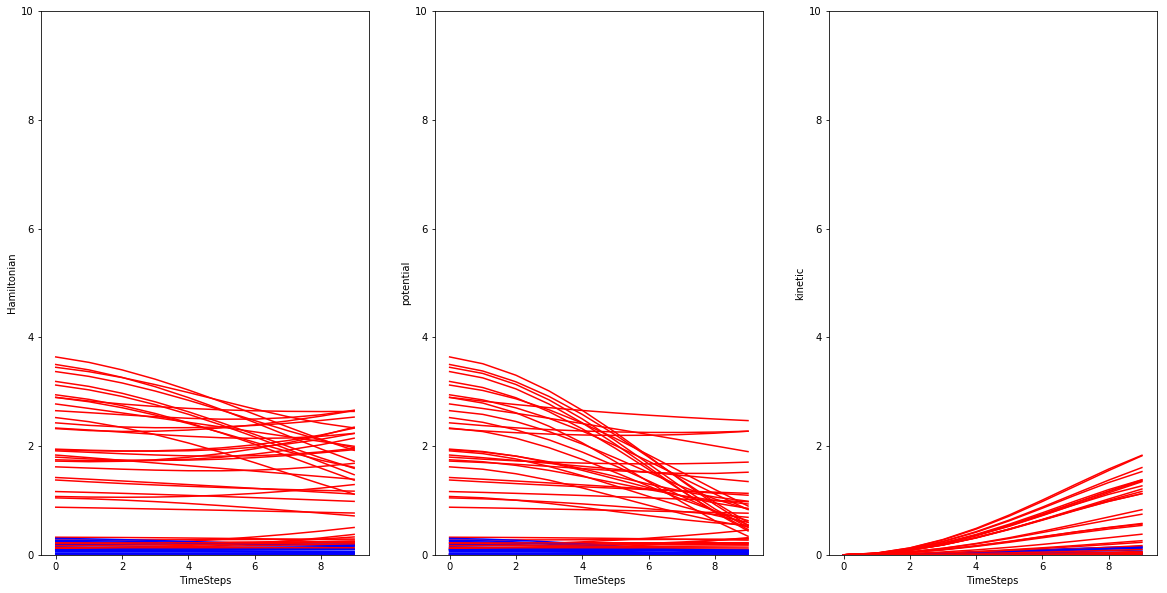

In [37]:
Hamiltonian_computation(modelQ2,small_inputs ,small_targets ,
                        steps=10,activation='tanh',ponential='quadratic',
                        show=True,y=10)



